In [1]:
!pip install mne scikit-learn tensorflow matplotlib seaborn pandas

from google.colab import drive
drive.mount('/content/drive')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 116.2 MB/s eta 0:00:00
Mounted at /content/drive


In [2]:
import os
os.listdir("/content/drive/MyDrive")


['odevson.mp4',
 'e784e920-40d4-4be8-a703-051228e20c96.jpg',
 'transkript (1) (1).pdf',
 'transkript (1).pdf',
 '10600322914_Ogrenci (1) (1).pdf',
 '10600322914_Ogrenci (1).pdf',
 '4a-emekli-aylik-bilgisi.pdf',
 'adli-sicil-kaydi.pdf',
 'nvi-yerlesim-yeri-ve-diger-adres-belgesi-sorgulama.pdf',
 'Colab Notebooks',
 '1k.jpg',
 '2k.jpg',
 'Staj',
 'CPE 310 SOFTWARE ENGINEERING_week_7 dokümanının çevrilmiş kopyası.gdoc',
 'makine',
 'Week7 dokümanının çevrilmiş kopyası.gdoc',
 '2010213011.pdf',
 'yok-ogrenci-belgesi-sorgulama (1).pdf',
 'ÖSYM Sonuç Açıklama Sistemi(YERLEŞTİRME).pdf',
 '60336.jpg',
 'Meryem_Betül_Mutlu.pdf',
 'Meryem_Betül_Mutlu_merged (1).pdf',
 'Meryem_Betül_Mutlu_merged.pdf',
 'Professional Minimalist CV Resume (4).pdf',
 '10600322914_Transkript (2) (1).pdf',
 '10600322914_Transkript (2).pdf',
 'yok-ogrenci-belgesi-sorgulama (2).pdf',
 'yerlesim-yeri-ve-diger-adres (1).pdf',
 'tapumeryem.png',
 'tapu faruk.png',
 'nvi-nufus-kayit-ornegi-belgesi-sorgulama (2

In [3]:
import os
import numpy as np
import pandas as pd
from scipy.stats import zscore
import mne

def load_sleep_data(data_folder):
    psg_files = sorted([f for f in os.listdir(data_folder) if 'PSG.edf' in f])
    hypnogram_files = sorted([f for f in os.listdir(data_folder) if 'Hypnogram.edf' in f])

    mapping = {
        'Sleep stage W': 0,
        'Sleep stage 1': 1,
        'Sleep stage 2': 2,
        'Sleep stage 3': 3,
        'Sleep stage 4': 3,
        'Sleep stage R': 4
    }

    X, y = [], []

    for psg_file, hypnogram_file in zip(psg_files, hypnogram_files):
        raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
        raw.pick_channels(['EEG Fpz-Cz'])
        annotations = mne.read_annotations(os.path.join(data_folder, hypnogram_file))
        raw.set_annotations(annotations)
        sfreq = raw.info['sfreq']
        signal = raw.get_data()[0]

        samples_per_epoch = int(30 * sfreq)  # 30 saniyelik epoch

        for onset, desc in zip(raw.annotations.onset, raw.annotations.description):
            if desc not in mapping:
                continue
            start = int(onset * sfreq)
            end = start + samples_per_epoch
            if end <= len(signal):
                epoch = zscore(signal[start:end])
                X.append(epoch)
                y.append(mapping[desc])

    return np.array(X), np.array(y)

data_path = '/content/drive/MyDrive/sleep-cassette'
X, y = load_sleep_data(data_path)


<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<ipython-input-3-68620a792cc4>:26: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<ipython-input-3-68620a792cc4>:26: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<ipython-input-3-68620a792cc4>:26: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<ipython-input-3-68620a792cc4>:26: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<ipython-input-3-68620a792cc4>:26: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<ipython-input-3-68620a792cc4>:26: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<ipython-input-3-68620a792cc4>:26: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<ipython-input-3-68620a792cc4>:26: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<ipython-input-3-68620a792cc4>:26: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<ipython-input-3-68620a792cc4>:26: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<ipython-input-3-68620a792cc4>:26: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<ipython-input-3-68620a792cc4>:26: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<ipython-input-3-68620a792cc4>:26: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<ipython-input-3-68620a792cc4>:26: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<ipython-input-3-68620a792cc4>:26: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<ipython-input-3-68620a792cc4>:26: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<ipython-input-3-68620a792cc4>:26: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<ipython-input-3-68620a792cc4>:26: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<ipython-input-3-68620a792cc4>:26: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<ipython-input-3-68620a792cc4>:26: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<ipython-input-3-68620a792cc4>:26: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<ipython-input-3-68620a792cc4>:26: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<ipython-input-3-68620a792cc4>:26: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<ipython-input-3-68620a792cc4>:26: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<ipython-input-3-68620a792cc4>:26: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<ipython-input-3-68620a792cc4>:26: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<ipython-input-3-68620a792cc4>:26: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<ipython-input-3-68620a792cc4>:26: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<ipython-input-3-68620a792cc4>:26: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<ipython-input-3-68620a792cc4>:26: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<ipython-input-3-68620a792cc4>:26: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<ipython-input-3-68620a792cc4>:26: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<ipython-input-3-68620a792cc4>:26: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<ipython-input-3-68620a792cc4>:26: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<ipython-input-3-68620a792cc4>:26: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<ipython-input-3-68620a792cc4>:26: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<ipython-input-3-68620a792cc4>:26: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<ipython-input-3-68620a792cc4>:26: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<ipython-input-3-68620a792cc4>:26: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<ipython-input-3-68620a792cc4>:26: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<ipython-input-3-68620a792cc4>:26: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<ipython-input-3-68620a792cc4>:26: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<ipython-input-3-68620a792cc4>:26: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<ipython-input-3-68620a792cc4>:26: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<ipython-input-3-68620a792cc4>:26: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<ipython-input-3-68620a792cc4>:26: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<ipython-input-3-68620a792cc4>:26: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<ipython-input-3-68620a792cc4>:26: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<ipython-input-3-68620a792cc4>:26: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<ipython-input-3-68620a792cc4>:26: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<ipython-input-3-68620a792cc4>:26: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<ipython-input-3-68620a792cc4>:26: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<ipython-input-3-68620a792cc4>:26: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<ipython-input-3-68620a792cc4>:26: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<ipython-input-3-68620a792cc4>:26: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<ipython-input-3-68620a792cc4>:26: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<ipython-input-3-68620a792cc4>:26: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<ipython-input-3-68620a792cc4>:26: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<ipython-input-3-68620a792cc4>:26: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<ipython-input-3-68620a792cc4>:26: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<ipython-input-3-68620a792cc4>:26: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<ipython-input-3-68620a792cc4>:26: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<ipython-input-3-68620a792cc4>:26: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<ipython-input-3-68620a792cc4>:26: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<ipython-input-3-68620a792cc4>:26: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<ipython-input-3-68620a792cc4>:26: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<ipython-input-3-68620a792cc4>:26: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<ipython-input-3-68620a792cc4>:26: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<ipython-input-3-68620a792cc4>:26: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<ipython-input-3-68620a792cc4>:26: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<ipython-input-3-68620a792cc4>:26: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<ipython-input-3-68620a792cc4>:26: RuntimeWarning: Omitted 1 annotation(s) that were outside data range.
  raw.set_annotations(annotations)
<ipython-input-3-68620a792cc4>:26: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=Fa

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<ipython-input-3-68620a792cc4>:26: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<ipython-input-3-68620a792cc4>:26: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<ipython-input-3-68620a792cc4>:26: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<ipython-input-3-68620a792cc4>:26: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<ipython-input-3-68620a792cc4>:26: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<ipython-input-3-68620a792cc4>:26: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<ipython-input-3-68620a792cc4>:26: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<ipython-input-3-68620a792cc4>:26: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<ipython-input-3-68620a792cc4>:26: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<ipython-input-3-68620a792cc4>:26: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<ipython-input-3-68620a792cc4>:26: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<ipython-input-3-68620a792cc4>:26: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<ipython-input-3-68620a792cc4>:26: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<ipython-input-3-68620a792cc4>:26: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<ipython-input-3-68620a792cc4>:26: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<ipython-input-3-68620a792cc4>:26: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<ipython-input-3-68620a792cc4>:26: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<ipython-input-3-68620a792cc4>:26: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<ipython-input-3-68620a792cc4>:26: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<ipython-input-3-68620a792cc4>:26: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<ipython-input-3-68620a792cc4>:26: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<ipython-input-3-68620a792cc4>:26: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<ipython-input-3-68620a792cc4>:26: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<ipython-input-3-68620a792cc4>:26: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<ipython-input-3-68620a792cc4>:26: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<ipython-input-3-68620a792cc4>:26: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<ipython-input-3-68620a792cc4>:26: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<ipython-input-3-68620a792cc4>:26: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<ipython-input-3-68620a792cc4>:26: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<ipython-input-3-68620a792cc4>:26: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<ipython-input-3-68620a792cc4>:26: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<ipython-input-3-68620a792cc4>:26: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<ipython-input-3-68620a792cc4>:26: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<ipython-input-3-68620a792cc4>:26: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<ipython-input-3-68620a792cc4>:26: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<ipython-input-3-68620a792cc4>:26: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<ipython-input-3-68620a792cc4>:26: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<ipython-input-3-68620a792cc4>:26: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<ipython-input-3-68620a792cc4>:26: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<ipython-input-3-68620a792cc4>:26: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<ipython-input-3-68620a792cc4>:26: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<ipython-input-3-68620a792cc4>:26: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<ipython-input-3-68620a792cc4>:26: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<ipython-input-3-68620a792cc4>:26: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<ipython-input-3-68620a792cc4>:26: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<ipython-input-3-68620a792cc4>:26: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<ipython-input-3-68620a792cc4>:26: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<ipython-input-3-68620a792cc4>:26: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<ipython-input-3-68620a792cc4>:26: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<ipython-input-3-68620a792cc4>:26: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<ipython-input-3-68620a792cc4>:26: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<ipython-input-3-68620a792cc4>:26: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<ipython-input-3-68620a792cc4>:26: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<ipython-input-3-68620a792cc4>:26: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<ipython-input-3-68620a792cc4>:26: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<ipython-input-3-68620a792cc4>:26: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<ipython-input-3-68620a792cc4>:26: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<ipython-input-3-68620a792cc4>:26: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<ipython-input-3-68620a792cc4>:26: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<ipython-input-3-68620a792cc4>:26: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<ipython-input-3-68620a792cc4>:26: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<ipython-input-3-68620a792cc4>:26: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<ipython-input-3-68620a792cc4>:26: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<ipython-input-3-68620a792cc4>:26: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<ipython-input-3-68620a792cc4>:26: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<ipython-input-3-68620a792cc4>:26: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<ipython-input-3-68620a792cc4>:26: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<ipython-input-3-68620a792cc4>:26: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<ipython-input-3-68620a792cc4>:26: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<ipython-input-3-68620a792cc4>:26: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<ipython-input-3-68620a792cc4>:26: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<ipython-input-3-68620a792cc4>:26: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<ipython-input-3-68620a792cc4>:26: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<ipython-input-3-68620a792cc4>:26: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<ipython-input-3-68620a792cc4>:26: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<ipython-input-3-68620a792cc4>:26: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<ipython-input-3-68620a792cc4>:26: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)
<ipython-input-3-68620a792cc4>:23: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(os.path.join(data_folder, psg_file), preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<ipython-input-3-68620a792cc4>:26: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)


In [4]:
#VERİ ARTIRMA
def augment_data(X, y):
    aug_X, aug_y = [], []
    for signal, label in zip(X, y):
        aug_X.append(signal)
        aug_y.append(label)

        # Gürültü ekle
        noise = np.random.normal(0, 0.1, signal.shape)
        aug_X.append(signal + noise)
        aug_y.append(label)

        # Zaman kaydır
        shift = np.roll(signal, 5)
        aug_X.append(shift)
        aug_y.append(label)

    return np.array(aug_X), np.array(aug_y)

X_aug, y_aug = augment_data(X, y)


In [ ]:
#veri artırma 2

In [5]:
#EĞİTİME HAZIRLIK
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight

X_aug = X_aug.reshape((X_aug.shape[0], X_aug.shape[1], 1))
X_train, X_test, y_train, y_test = train_test_split(X_aug, y_aug, test_size=0.2, stratify=y_aug, random_state=42)

# Sınıf ağırlıkları
weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(enumerate(weights))


In [6]:
#MODEL Oluşturma 1
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, BatchNormalization, ReLU, MaxPooling1D, Bidirectional, LSTM, Dropout, Dense

input_layer = Input(shape=(X_train.shape[1], 1))

x = Conv1D(64, 50, strides=6, padding="same")(input_layer)
x = BatchNormalization()(x)
x = ReLU()(x)
x = MaxPooling1D(pool_size=8, strides=8, padding='same')(x)

x = Conv1D(128, 8, strides=1, padding="same")(x)
x = BatchNormalization()(x)
x = ReLU()(x)
x = MaxPooling1D(pool_size=4, strides=4, padding='same')(x)

x = Bidirectional(LSTM(64, return_sequences=False))(x)
x = Dropout(0.5)(x)
output = Dense(len(np.unique(y)), activation='softmax')(x)

model = Model(inputs=input_layer, outputs=output)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 3000, 1)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 500, 64)        │         3,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 500, 64)        │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 500, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 63, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 63, 128)        │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 63, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_1 (ReLU)                  │ (None, 63, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 16, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 128)            │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 169,157 (660.77 KB)

 Trainable params: 168,773 (659.27 KB)

 Non-trainable params: 384 (1.50 KB)

In [7]:
#modeli eğitme
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=64,
    class_weight=class_weights,
    callbacks=[early_stop]
)


Epoch 1/50
830/830 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.5251 - loss: 1.0487 - val_accuracy: 0.6196 - val_loss: 0.8676
Epoch 2/50
830/830 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.6348 - loss: 0.8234 - val_accuracy: 0.6279 - val_loss: 0.8457
Epoch 3/50
830/830 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.6548 - loss: 0.7694 - val_accuracy: 0.6777 - val_loss: 0.7673
Epoch 4/50
830/830 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.6663 - loss: 0.7320 - val_accuracy: 0.6796 - val_loss: 0.7634
Epoch 5/50
830/830 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.6792 - loss: 0.7023 - val_accuracy: 0.7113 - val_loss: 0.6944
Epoch 6/50
830/830 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.6938 - loss: 0.6644 - val_accuracy: 0.6677 - val_loss: 0.7869
Epoch 7/50
830/830 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.7075 - loss: 0.6275 - val_accuracy: 0.7195 - val_loss: 0.6748
Epoch 8/50
830/830 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.7203 - loss: 0.5930 - val_acc

In [ ]:
#geliştirilmiş model oluşturma 2

415/415 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

           0       0.89      0.83      0.86      2219
           1       0.79      0.81      0.80      3566
           2       0.83      0.84      0.83      3827
           3       0.93      0.90      0.92      2732
           4       0.82      0.90      0.86       936

    accuracy                           0.85     13280
   macro avg       0.85      0.86      0.85     13280
weighted avg       0.85      0.85      0.85     13280



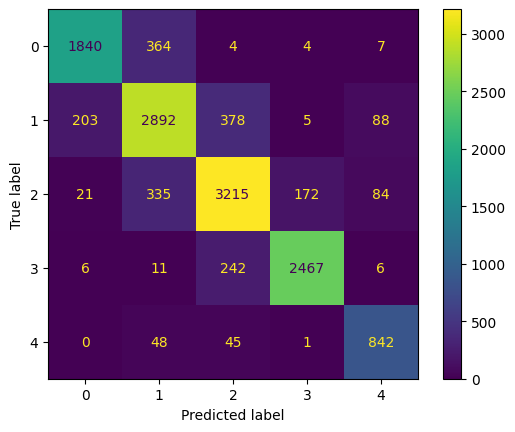

In [8]:
#doğruluk ve karışıklık matrisi
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred = np.argmax(model.predict(X_test), axis=1)

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


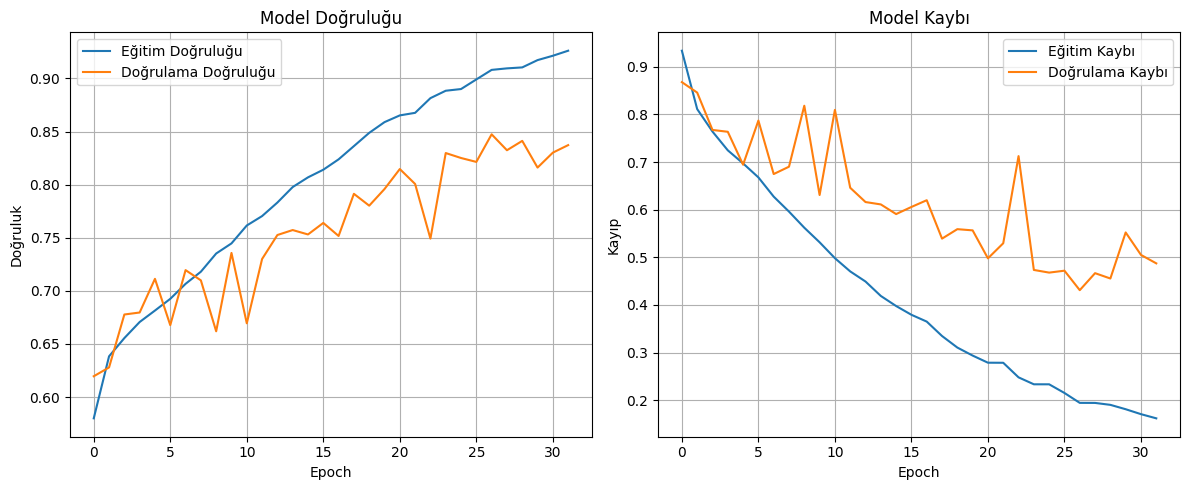

In [9]:
import matplotlib.pyplot as plt

# Eğitim ve doğrulama doğruluğu
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.title('Model Doğruluğu')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend()
plt.grid(True)

# Eğitim ve doğrulama kaybı
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.title('Model Kaybı')
plt.xlabel('Epoch')
plt.ylabel('Kayıp')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [10]:
# Kaydedilecek klasörü oluştur
model_path = "/content/drive/MyDrive/sleep-cassette/model_CONV1D.keras"
model.save(model_path)
print(f"Model kaydedildi: {model_path}")


Model kaydedildi: /content/drive/MyDrive/sleep-cassette/model_CONV1D.keras


In [18]:
def analyze_patient(psg_path, hypnogram_path):
    raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)
    raw.pick_channels(['EEG Fpz-Cz'])
    annotations = mne.read_annotations(hypnogram_path)
    raw.set_annotations(annotations)

    sfreq = raw.info['sfreq']
    signal = raw.get_data()[0]
    epoch_duration = 30
    samples_per_epoch = int(epoch_duration * sfreq)

    mapping = {
        'Sleep stage W': 0,
        'Sleep stage 1': 1,
        'Sleep stage 2': 2,
        'Sleep stage 3': 3,
        'Sleep stage 4': 3,
        'Sleep stage R': 4
    }

    annotations_df = pd.DataFrame({
        'onset': raw.annotations.onset,
        'description': raw.annotations.description
    })
    annotations_df = annotations_df[annotations_df['description'].isin(mapping.keys())].reset_index(drop=True)

    epochs = []
    true_labels = []

    for _, row in annotations_df.iterrows():
        start_sample = int(row['onset'] * sfreq)
        end_sample = start_sample + samples_per_epoch
        if end_sample <= len(signal):
            epoch = signal[start_sample:end_sample]
            epoch = zscore(epoch)
            epochs.append(epoch)
            true_labels.append(mapping[row['description']])

    X_individual = np.array(epochs).reshape(-1, samples_per_epoch, 1)
    y_pred = model.predict(X_individual)
    y_pred_classes = np.argmax(y_pred, axis=1)

    # === Uyku Kalitesi Metrikleri ===
    df_results = pd.DataFrame({'epochs': y_pred_classes})
    TST = len(df_results[df_results['epochs'] != 0]) * 30 / 60
    N3 = len(df_results[df_results['epochs'] == 3]) * 30 / 60
    REM = len(df_results[df_results['epochs'] == 4]) * 30 / 60
    total_time = len(df_results) * 30 / 60

    sleep_efficiency = (TST / total_time) * 100
    deep_sleep_percent = (N3 / TST) * 100 if TST != 0 else 0
    rem_percent = (REM / TST) * 100 if TST != 0 else 0

    print("=== Uyku Verimlilik Analizi ===")
    print(f"Toplam Uyku Süresi: {TST:.2f} dk")
    print(f"Uyku Verimliliği: %{sleep_efficiency:.2f}")
    print(f"Derin Uyku Oranı (N3): %{deep_sleep_percent:.2f}")
    print(f"REM Uyku Oranı: %{rem_percent:.2f}")

    # === Hormon Tahmini (Basit Formüller) ===
    melatonin = (deep_sleep_percent * 0.6) + (sleep_efficiency * 0.3) + ((REM / TST) * 100 * 0.1 if TST != 0 else 0)
    cortisol = 25 - (sleep_efficiency * 0.15) - (TST / 10)
    gh = (N3 * 0.08) + (deep_sleep_percent * 0.2)

    print("\n=== Hormon Tahminleri ===")
    print(f"Tahmini Melatonin: {melatonin:.2f} ng/mL")
    print(f"Tahmini Kortizol: {cortisol:.2f} µg/dL")
    print(f"Tahmini Büyüme Hormonu (GH): {gh:.2f} ng/mL")

    # === Görselleştirme: Uyku Verimliliği ve Hormon Seviyeleri ===
    import matplotlib.pyplot as plt

    # Uyku kalitesi grafiği
    labels = ['Uyku Verimliliği', 'Derin Uyku (N3)', 'REM Uyku']
    values = [sleep_efficiency, deep_sleep_percent, rem_percent]

    plt.figure(figsize=(8, 5))
    plt.bar(labels, values)
    plt.title("Uyku Kalitesi Göstergeleri")
    plt.ylim(0, 100)
    plt.ylabel("Yüzde (%)")
    plt.grid(axis='y')
    plt.show()

    # Hormon tahminleri grafiği
    hormone_labels = ['Melatonin (ng/mL)', 'Kortizol (µg/dL)', 'Büyüme Hormonu (GH, ng/mL)']
    hormone_values = [melatonin, cortisol, gh]

    plt.figure(figsize=(8, 5))
    bars = plt.bar(hormone_labels, hormone_values)
    plt.title("Tahmini Hormon Seviyeleri")
    plt.grid(axis='y')

    # Değerleri çubukların üstüne yaz
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2.0, yval + 0.5, f'{yval:.2f}', ha='center', va='bottom')

    plt.show()


<ipython-input-18-605560ae3198>:2: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)
<ipython-input-18-605560ae3198>:2: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)
<ipython-input-18-605560ae3198>:2: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_path, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


<ipython-input-18-605560ae3198>:5: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)


=== Uyku Verimlilik Analizi ===
Toplam Uyku Süresi: 64.50 dk
Uyku Verimliliği: %86.00
Derin Uyku Oranı (N3): %33.33
REM Uyku Oranı: %11.63

=== Hormon Tahminleri ===
Tahmini Melatonin: 46.96 ng/mL
Tahmini Kortizol: 5.65 µg/dL
Tahmini Büyüme Hormonu (GH): 8.39 ng/mL


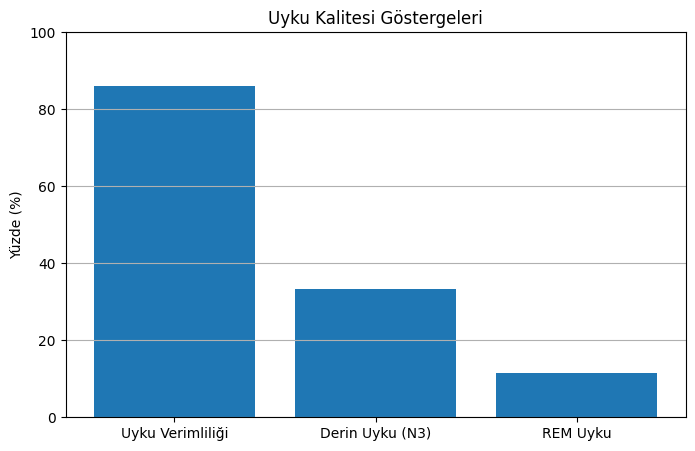

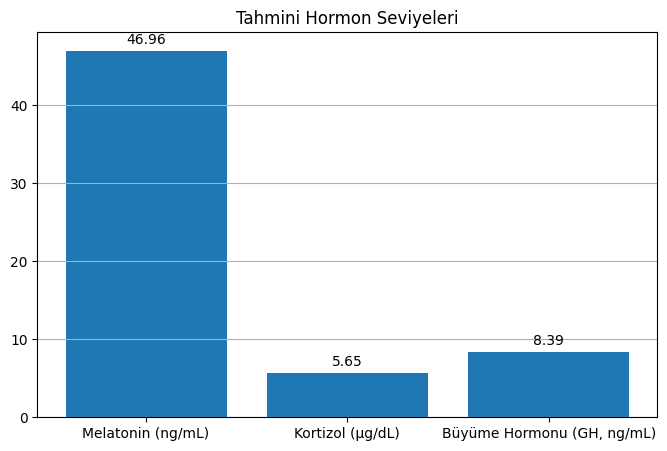

In [19]:
analyze_patient(
    "/content/drive/MyDrive/sleep-cassette/SC4002E0-PSG.edf",
    "/content/drive/MyDrive/sleep-cassette/SC4002EC-Hypnogram.edf"
)